# Lab 1: Linear Classifier, Softmax Function, Loss Function, & Stochastic Gradient Descent
The goal of this lab is to help you understand basic components of neural networks and convolutional neural networks by introducing linear classifier, softmax function, cross-entropy loss function, and stochastic gradient descent. If you do not understand some of the concepts, please refer to the background notes in Wattle.

Another aim of this lab is to get familiar with using Python and NumPy, such as basic matrix manipulation in NumPy. This will be helpful later on when we start using PyTorch deep learning framework, which is essentially the same as NumPy. 


In [14]:
from __future__ import print_function

import random
import numpy as np
import matplotlib.pyplot as plt
import pdb

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load MNIST Data

In [15]:
### Load MNIST data ###
import mnist
mnist.init() # Only need to run once, can be commented out after first run
X_train, y_train, X_test, y_test = mnist.load()

Download complete.
Save complete.


In [16]:
### Preprocess data ###
num_training = 59000
num_validation = 1000
num_dev = 500
num_test = 1000

# subsample the data
# Validation set
mask = list(range(num_training, num_training + num_validation))
X_val = X_train[mask]
y_val = y_train[mask]
# Training set
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]
# Subsample of test set
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
# Create a small development set (subsample of training set)
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Normalize image
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
X_dev = X_dev / 255
mean_image = np.mean(X_train, axis = 0)
X_train = X_train - mean_image
X_val = X_val - mean_image
X_test = X_test - mean_image
X_dev = X_dev - mean_image

## Open the file softmax.py and implement the softmax_loss function. 


In [17]:
from softmax import softmax_loss

# Generate a random softmax weight matrix and use it to compute the loss
W = np.random.randn(784, 10) * 1e-4
b = np.random.randn(10) * 1e-4
loss, grad_W, grad_b = softmax_loss(W, b, X_dev, y_dev, 0.0)

# As a rough sanity check, loss should be close to -log(0.1)
print('loss: {:f}'.format(loss))
print('sanity check: {:f}'.format(-np.log(0.1)))


loss: 2.302584
sanity check: 2.302585


## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly. Think about how we define the loss function. 

**Your answer:** 

Total classes are 10 where their correct labels (actual labels) are 1, so if we sum up all these then it comes to 10.
Now the probability of correctly predicting class is 1/10, then loss(negative likelihood) would become -log(1/10) i.e -log(0.1)

**Run gradient check function**

In [18]:
# gradient check function
def grad_check(f, x, analytic_grad, num_checks=10, h=1e-5):
  """
  sample a few random elements and only return numerical
  in this dimensions.
  """

  for i in range(num_checks):
    ix = tuple([random.randrange(m) for m in x.shape])

    oldval = x[ix]
    x[ix] = oldval + h # increment by h
    fxph = f(x) # evaluate f(x + h)
    x[ix] = oldval - h # increment by h
    fxmh = f(x) # evaluate f(x - h)
    x[ix] = oldval # reset

    grad_numerical = (fxph - fxmh) / (2 * h)
    grad_analytic = analytic_grad[ix]
    rel_error = abs(grad_numerical - grad_analytic) / (abs(grad_numerical) + abs(grad_analytic))
    print('numerical: %f analytic: %f, relative error: %e' % (grad_numerical, grad_analytic, rel_error))

In [19]:
# Your analytical gradient should be close to numerical gradient, error less than 1e-5. 
f = lambda w: softmax_loss(w, b, X_dev, y_dev, 0.0)[0]
grad_numerical_w = grad_check(f, W, grad_W, 5)
f = lambda b: softmax_loss(W, b, X_dev, y_dev, 0.0)[0]
#grad_numerical_b = grad_check(f, b, grad_b, 5)


# similar to SVM case, do another gradient check with regularization
loss, grad_W, grad_b = softmax_loss(W, b, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss(w, b, X_dev, y_dev, 5e1)[0]
grad_numerical_W = grad_check(f, W, grad_W, 5)
f = lambda b: softmax_loss(W, b, X_dev, y_dev, 5e1)[0]
grad_numerical_b = grad_check(f, b, grad_b, 5)

numerical: 0.001059 analytic: 0.001059, relative error: 8.582224e-09
numerical: 0.017823 analytic: 0.017823, relative error: 8.672215e-11
numerical: 0.001036 analytic: 0.001036, relative error: 1.102398e-08
numerical: 0.000000 analytic: 0.000000, relative error: 1.271704e-05
numerical: 0.000914 analytic: 0.000914, relative error: 1.020178e-08
numerical: -0.003677 analytic: -0.003677, relative error: 2.566872e-09
numerical: -0.001262 analytic: -0.001262, relative error: 3.457559e-10
numerical: 0.001832 analytic: 0.001832, relative error: 4.119852e-09
numerical: 0.004410 analytic: 0.004410, relative error: 9.973308e-10
numerical: 0.002340 analytic: 0.002340, relative error: 1.522517e-09
numerical: 0.000000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 0.000000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 0.000000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 0.000000 analytic: 0.000000, relative error: 1.000000e+00
numerical: 0.000000 analytic: 

## Open the file linear_classifier.py and implement Stochastic Gradient Descent. Complete the function train and predict.

In [20]:
from linear_classifier import LinearClassifier
classifier = LinearClassifier()
loss_hist = classifier.train(X_train, y_train, learning_rate=1e-7, reg=5e4, num_iters=1500, verbose=True)

iteration 0 / 1500: loss 205.151990
iteration 100 / 1500: loss 76.739844
iteration 200 / 1500: loss 29.618058
iteration 300 / 1500: loss 12.326123
iteration 400 / 1500: loss 5.980805
iteration 500 / 1500: loss 3.652298
iteration 600 / 1500: loss 2.797870
iteration 700 / 1500: loss 2.484311
iteration 800 / 1500: loss 2.369278
iteration 900 / 1500: loss 2.327048
iteration 1000 / 1500: loss 2.311556
iteration 1100 / 1500: loss 2.305870
iteration 1200 / 1500: loss 2.303785
iteration 1300 / 1500: loss 2.303018
iteration 1400 / 1500: loss 2.302736


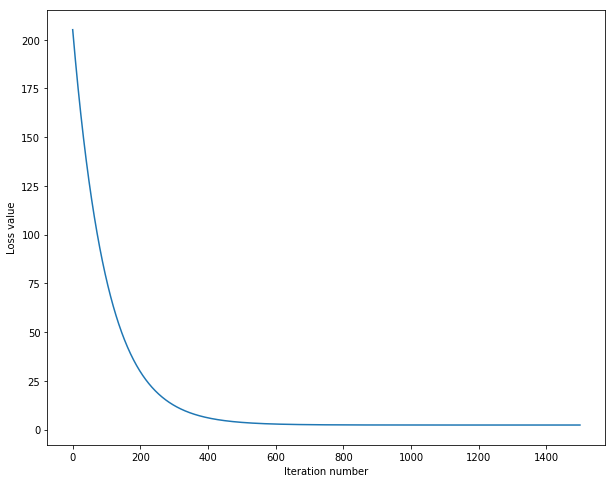

In [21]:
# Plot loss function as iteration number.
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [22]:
# Implement predict function and evaluate performance on training and validation set.
y_train_pred = classifier.predict(X_train)
print('training accuracy: {:f}'.format(np.mean(y_train == y_train_pred)))
y_val_pred = classifier.predict(X_val)
print('validation accuracy: {:f}'.format(np.mean(y_val == y_val_pred)))

training accuracy: 0.675051
validation accuracy: 0.738000


## Hyperparameter tuning. Find the best set of learning rate and regularization strength. 

In [23]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths.
results = {}
best_val = -1
worst_val = 1
best_classifier = None # updated it from best_softmax to best_classifier since it was being used as best_classifier in all the below cells.
worst_classifier = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [2.5e4, 5e4]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
#                                                                              #
#                                                                              #
################################################################################
lr_num = 3
rs_num = 8
for i in range(lr_num):
    for j in range(rs_num):
        lr = learning_rates[0] + i * (learning_rates[1] - learning_rates[0]) / lr_num
        reg_str = regularization_strengths[0] + j * (regularization_strengths[1] - regularization_strengths[0])/ rs_num
        linearClassifier = LinearClassifier()
        loss_hist = linearClassifier.train(X_train, y_train, learning_rate=lr, reg=reg_str,
                              num_iters=1500, verbose=False)

        y_train_pred = linearClassifier.predict(X_train)
        acc_train = np.mean(y_train == y_train_pred)
        y_val_pred = linearClassifier.predict(X_val)
        acc_val = np.mean(y_val == y_val_pred)

        results[(lr, reg_str)] = (acc_train, acc_val)

        if acc_val > best_val:
            best_val = acc_val
            best_classifier = linearClassifier
        
        if acc_val < worst_val:
            worst_val = acc_val
            worst_classifier = linearClassifier
        
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.118237 val accuracy: 0.143000
lr 1.000000e-07 reg 2.812500e+04 train accuracy: 0.172712 val accuracy: 0.170000
lr 1.000000e-07 reg 3.125000e+04 train accuracy: 0.258661 val accuracy: 0.310000
lr 1.000000e-07 reg 3.437500e+04 train accuracy: 0.339712 val accuracy: 0.295000
lr 1.000000e-07 reg 3.750000e+04 train accuracy: 0.374305 val accuracy: 0.414000
lr 1.000000e-07 reg 4.062500e+04 train accuracy: 0.493203 val accuracy: 0.512000
lr 1.000000e-07 reg 4.375000e+04 train accuracy: 0.569881 val accuracy: 0.627000
lr 1.000000e-07 reg 4.687500e+04 train accuracy: 0.657373 val accuracy: 0.728000
lr 2.333333e-07 reg 2.500000e+04 train accuracy: 0.723847 val accuracy: 0.816000
lr 2.333333e-07 reg 2.812500e+04 train accuracy: 0.734508 val accuracy: 0.816000
lr 2.333333e-07 reg 3.125000e+04 train accuracy: 0.725373 val accuracy: 0.810000
lr 2.333333e-07 reg 3.437500e+04 train accuracy: 0.728356 val accuracy: 0.813000
lr 2.333333e-07 reg 3.750000

In [24]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_classifier.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: {:f}'.format(test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.710000


## Visualization

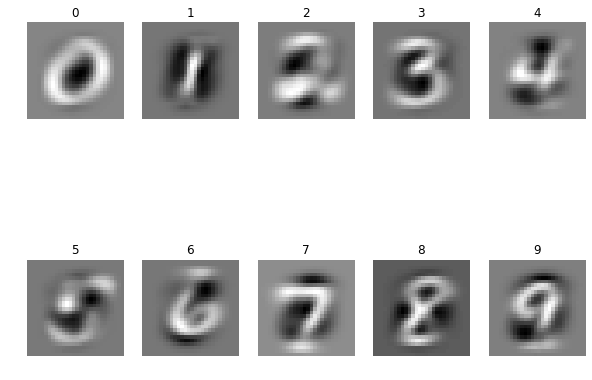

In [25]:
# Visualize the learned weights for each class
w = best_classifier.W#[:-1,:] # strip out the bias
w = w.reshape(28, 28, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

## Inline Question 2:
Visualize the learned weights. What did you find? What can you conclude about linear classifiers?

**Your answer:** 

From the above plot we can see that classifier is able to learn the structure or features of images. These features are quite uncorrelated and have high variance. Moreover these images are quite blurred but at least it is able to recognize and learn the corresponding digits from images.

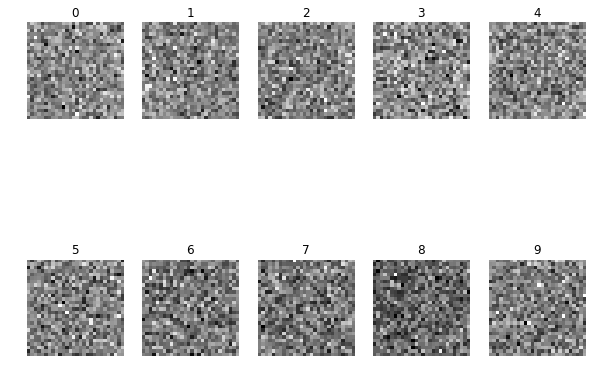

In [26]:
# Visualize the learned weights for each class (worst case)
w_ = worst_classifier.W #[:-1,:] # strip out the bias
w_ = w_.T
w_ = w_.reshape(28, 28, 10)

w_min, w_max = np.min(w_), np.max(w_)

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w_[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

## Inline Question 3:
Visualize the learned weights. How does it look different (or same) from the previous one? What can you conclude from it?

**Your answer:** 

In this case the images are quite noisy, its completely different or opposite from the previous one (above plot). 
Here the learned weights or features are quite correlated due to which we are not able to see any kind of pattern.
Such noisy patterns in the network can be due to insufficient training of the classifier or possibly due to very low regularization strength that may have cause overfitting.